<div style="font-size:450%;font-weight:600;text-align:center;color:#0277bd;height:40px;margin-top:20px;">
    3<span style="font-size:60%;color:red;">.</span> Finalisation and Modelling
</div>

The finalisation of the data includes:

- `scaling` features so they all span a similiar range of value, possibly with easy-to-work-with distributions (normal-like)
- `encoding` the categorical features, and `dropping` the un-used ones
- (optionally) `balancing` the classes with different techniques

Then `modelling` can be done on the resulting data set.

# Libraries

In [85]:
# standard
from pathlib import Path

# data
import numpy as np
import pandas as pd

# fancy
from termcolor import colored

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
sb.set(style='whitegrid', context='talk')

# Config

In [2]:
exec(Path('scripts/loader.py').read_bytes())    # this will load the ScriptLoader class into global namespace
scripts = ScriptLoader(prefix='scripts')  # each script path, if not absolute, will be prefixed with `prefix` value

# Load exported data

In [58]:
scripts.load('data')

script "data.py" read and loaded into namespace


In [45]:
x0 = load_export('X', finalize=False)

# Pre-processing parameters

In [10]:
scripts.load('py_tools')

script "py_tools.py" have not changed. Not reading again


In [7]:
# read the pre-processing parameters saved when we exported the data (02-Features.ipynb)
pp = read_yaml(outputs / 'X_finalization_params.yaml')

# Scaling features

Without such an imbalanced problem, we would probably be fine with an algorithm such as XGBoost without scaling features.

However the classes here are extremely imbalanced. The techniques trying to fix that issue (also true for algorithms such as **One class SVM** or more generally **Outliers detection**, training only on one class) will better work when the data features are on a similar scale.

In [46]:
# scale only numerical features (float or int)
x = x0.select_dtypes('number').copy()

In [155]:
x0.shape[1], x.shape[1]

(62, 53)

In [48]:
stats = x.describe()

In [49]:
stats.index.values

array(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'],
      dtype=object)

In [66]:
# drop categorical features
stats.drop(pp['categoricals'], axis=1, inplace=True)

In [67]:
# show features with mean > 1.5, or max. > 1
loc = (stats.loc['mean'] > 1.5) | (stats.loc['max'] > 1)

In [68]:
# have a look at the features we excluded
stats.loc[:, ~loc]

Public_Liability_Limit_1000000  Public_Liability_Limit_1000000.1  \
count                   232962.000000                     232962.000000   
mean                         0.419807                          0.030383   
std                          0.493528                          0.171638   
min                          0.000000                          0.000000   
25%                          0.000000                          0.000000   
50%                          0.000000                          0.000000   
75%                          1.000000                          0.000000   
max                          1.000000                          1.000000   

       Public_Liability_Limit_2000000  Public_Liability_Limit_5000000  \
count                   232962.000000                   232962.000000   
mean                         0.329341                        0.220469   
std                          0.469975                        0.414564   
min                          0.000000                        0.000000   
25%                          0.000000                        0.000000   
50%                          0.000000                        0.000000   
75%                          1.000000                        0.000000   
max                          1.000000                        1.000000   

       Public_Liability_Limit_5000000.1  Public_Liability_Limit_1000000.2  \
count                     232962.000000                     232962.000000   
mean                           0.030383                          0.419807   
std                            0.171638                          0.493528   
min                            0.000000                          0.000000   
25%                            0.000000                          0.000000   
50%                            0.000000                          0.000000   
75%                            0.000000                          1.000000   
max                            1.000000                          1.000000   

       Public_Liability_Limit_1000000.3  Employers_Liability_Limit_1000  \
count                     232962.000000                   232962.000000   
mean                           0.030383                        0.279415   
std                            0.171638                        0.448713   
min                            0.000000                        0.000000   
25%                            0.000000                        0.000000   
50%                            0.000000                        0.000000   
75%                            0.000000                        1.000000   
max                            1.000000                        1.000000   

       Professional_Indemnity_Limit_5  Professional_Indemnity_Limit_5.1  \
count                   232962.000000                     232962.000000   
mean                         0.045162                          0.024227   
std                          0.207659                          0.153754   
min                          0.000000                          0.000000   
25%                          0.000000                          0.000000   
50%                          0.000000                          0.000000   
75%                          0.000000                          0.000000   
max                          1.000000                          1.000000   

                 ...              Professional_Indemnity_Limit_2.2  \
count            ...                                 232962.000000   
mean             ...                                      0.032812   
std              ...                                      0.178145   
min              ...                                      0.000000   
25%              ...                                      0.000000   
50%              ...                                      0.000000   
75%              ...                                      0.000000   
max              ...                                      1.000000 

In [69]:
list(stats.loc[:, ~loc])

['Public_Liability_Limit_1000000',
 'Public_Liability_Limit_1000000.1',
 'Public_Liability_Limit_2000000',
 'Public_Liability_Limit_5000000',
 'Public_Liability_Limit_5000000.1',
 'Public_Liability_Limit_1000000.2',
 'Public_Liability_Limit_1000000.3',
 'Employers_Liability_Limit_1000',
 'Professional_Indemnity_Limit_5',
 'Professional_Indemnity_Limit_5.1',
 'Professional_Indemnity_Limit_1',
 'Professional_Indemnity_Limit_1.1',
 'Professional_Indemnity_Limit_2',
 'Professional_Indemnity_Limit_2.1',
 'Professional_Indemnity_Limit_5.2',
 'Professional_Indemnity_Limit_5.3',
 'Professional_Indemnity_Limit_1.2',
 'Professional_Indemnity_Limit_1.3',
 'Professional_Indemnity_Limit_2.2',
 'Professional_Indemnity_Limit_2.3',
 'Tools_Sum_Insured_Ind',
 'Contract_Works_Sum_Insured_Ind',
 'Hired_in_Plan_Sum_Insured_Ind',
 'Own_Plant_Sum_Insured_Ind',
 'Public_Liability_Limit_5000000.2',
 'Public_Liability_Limit_5000000.3',
 'Professional_Indemnity_Limit_g',
 'Gross PI Premium_nan_flag']

In [70]:
stats.loc['min', ~loc].values

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [71]:
stats.loc['max', ~loc].values

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [72]:
stats.loc['mean', ~loc].values

array([0.41980666, 0.03038264, 0.32934127, 0.22046943, 0.03038264,
       0.41980666, 0.03038264, 0.27941467, 0.04516187, 0.02422713,
       0.02609009, 0.09527734, 0.03281222, 0.02659661, 0.04516187,
       0.02422713, 0.02609009, 0.09527734, 0.03281222, 0.02659661,
       0.12486157, 0.02349739, 0.01813601, 0.01671517, 0.22046943,
       0.03038264, 0.25016526, 0.84916853])

In [73]:
stats.loc['std', ~loc].values

array([0.49352819, 0.17163816, 0.46997505, 0.41456411, 0.17163816,
       0.49352819, 0.17163816, 0.44871258, 0.20765949, 0.15375394,
       0.1594036 , 0.29359826, 0.1781452 , 0.16090166, 0.20765949,
       0.15375394, 0.1594036 , 0.29359826, 0.1781452 , 0.16090166,
       0.33056259, 0.15147728, 0.1334435 , 0.12820236, 0.41456411,
       0.17163816, 0.433109  , 0.3578853 ])

## RobustScaler

In [91]:
# try some scaling
features = list(stats.loc[:, loc])
scaler = dict(name='RobustScaler')
xs1, o1 = apply_transform(x, features, scaler, name='scaler', inplace=False)

In [92]:
for f, p in o1.items():
    r = p['fit_results']
    msg = f'{f:.<35s} : {p["fit_results"]}\n        {stats.loc[["mean", "std", "min", "max"], f].to_dict()}'
    if r['center_'] == 0 and r['scale_'] == 1:
        print(colored(msg, 'red'))
    else:
        print(msg)

Public Liability Limit............. : {'center_': 2000000.0, 'scale_': 4000000.0}
        {'mean': 2484662.734694929, 'std': 2028211.0469891957, 'min': 1000000.0, 'max': 10000000.0}
Employers Liability Limit.......... : {'center_': 0.0, 'scale_': 10000000.0}
        {'mean': 2794146.68486706, 'std': 4487125.759270271, 'min': 0.0, 'max': 10000000.0}
Tools Sum Insured.................. : {'center_': 0.0, 'scale_': 1.0}
        {'mean': 357.88568998377417, 'std': 1209.3104827783382, 'min': 0.0, 'max': 30000.0}
Professional Indemnity Limit....... : {'center_': 0.0, 'scale_': 50000.0}
        {'mean': 173654.28696525615, 'std': 424252.4047441991, 'min': 0.0, 'max': 2000000.0}
Contract Works Sum Insured......... : {'center_': 0.0, 'scale_': 1.0}
        {'mean': 3641.602209802457, 'std': 32263.748525080955, 'min': 0.0, 'max': 1000000.0}
Hired in Plan Sum Insured.......... : {'center_': 0.0, 'scale_': 1.0}
        {'mean': 808.4261553386389, 'std': 7053.174456000272, 'min': 0.0, 'max': 250000

We see that 8 features do not get scaled with this method (the ones with `center_ = 0` and `scale_ = 1`. The issue is that they have a large number of 0, hence their `min, max, mean, std` significantly depart from 0 or 1.

Let's see what the scaling has done for the first "non-treated" feature

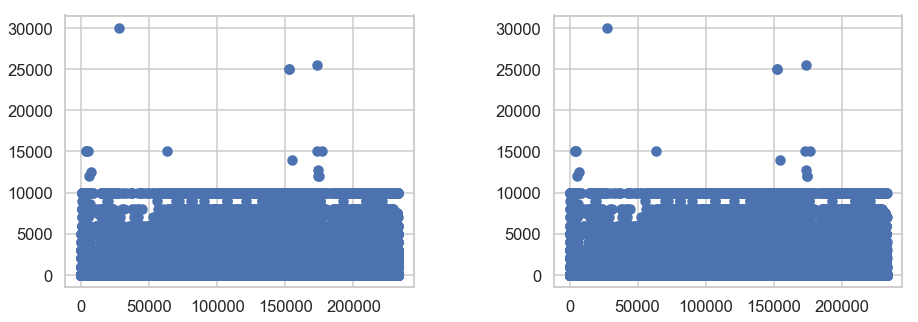

In [96]:
name = 'Tools Sum Insured'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.scatter(xs1[name].index, xs1[name])
ax2.scatter(x[name].index, x[name])
plt.subplots_adjust(wspace=.4)

/Users/mhavel/Documents/working/virtualenvs/default/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


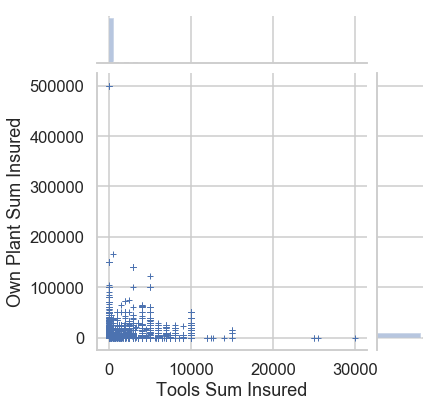

In [126]:
_x, _y = ['Tools Sum Insured', 'Own Plant Sum Insured']
g = sb.jointplot(_x, _y, data=xs1, s=30, linewidth=1, marker='+')
g.set_axis_labels(_x, _y)

## QuantileTransformer('normal')

In [142]:
# try some scaling
features = list(stats.loc[:, loc])
scaler = dict(name='QuantileTransformer', params={'output_distribution': 'normal'})
xs2, o2 = apply_transform(x, features, scaler, name='scaler', inplace=False)

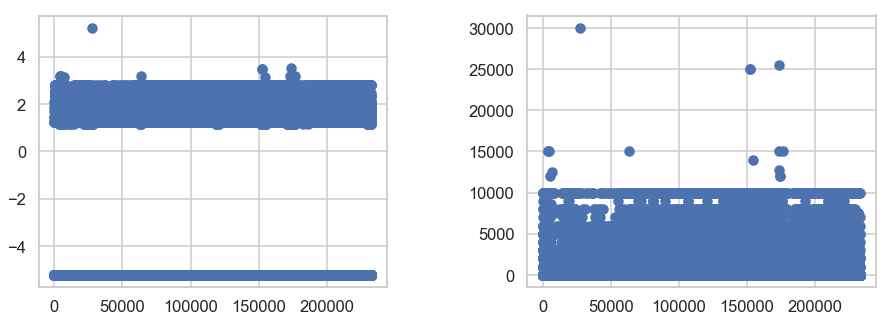

In [143]:
name = 'Tools Sum Insured'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.scatter(xs2[name].index, xs2[name])
ax2.scatter(x[name].index, x[name])
plt.subplots_adjust(wspace=.4)

See how well we separate the data: values of 0 (most samples) lies at the bottom, and the rest are more grouped further up in the transformed space. It might be easier to learn from such a distribution.

/Users/mhavel/Documents/working/virtualenvs/default/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


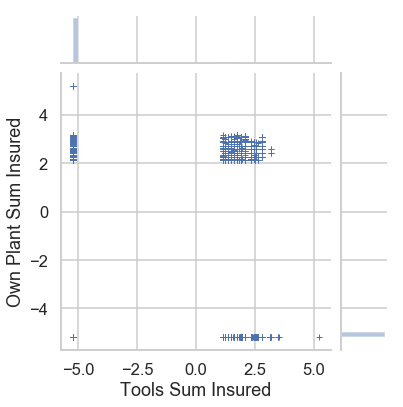

In [144]:
_x, _y = ['Tools Sum Insured', 'Own Plant Sum Insured']
g = sb.jointplot(_x, _y, data=xs2, s=30, linewidth=1, marker='+')
# sb.rugplot(xs2[_x], color="g", ax=g.ax_joint)
# sb.rugplot(xs2[_y], vertical=True, ax=g.ax_joint)
g.set_axis_labels(_x, _y)

With this transformation, we've separated the samples into 4 groups (with still most samples, 86%, lying in the bottom left corner). And the scales are similar, with samples roughly centered on (0, 0).

In [145]:
print(xs2.loc[xs2[_x] < -5, _x].size / xs2.shape[0] * 100)
print(xs2.loc[xs2[_y] < -4, _y].size / xs2.shape[0] * 100)
print(xs2.loc[(xs2[_x] < -5) & (xs2[_y] < -4)].shape[0] / xs2.shape[0] * 100)

87.51384345944832
98.32848275684447
86.6046823087027


## PowerTransformer

In [127]:
# try some scaling
features = list(stats.loc[:, loc])
scaler = dict(name='PowerTransformer')
xs3, o3 = apply_transform(x, features, scaler, name='scaler', inplace=False)

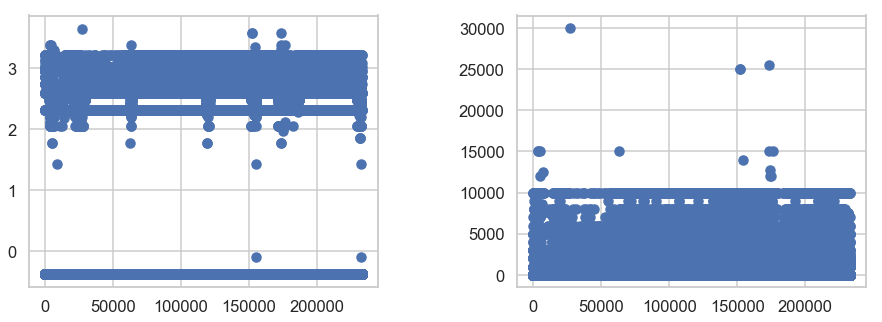

In [128]:
name = 'Tools Sum Insured'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.scatter(xs3[name].index, xs3[name])
ax2.scatter(x[name].index, x[name])
plt.subplots_adjust(wspace=.4)

/Users/mhavel/Documents/working/virtualenvs/default/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


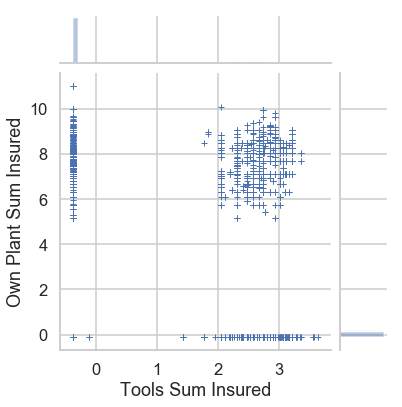

In [129]:
_x, _y = ['Tools Sum Insured', 'Own Plant Sum Insured']
g = sb.jointplot(_x, _y, data=xs3, s=30, linewidth=1, marker='+')
g.set_axis_labels(_x, _y)

## Final scaling choice: QuantileTransformer('normal')

In [164]:
pp['default_scaler'] = {'name': 'QuantileTransformer', 'params': {'output_distribution': 'normal'}}
pp['scale'] = features

In [165]:
pp

{'categoricals': ['Underwriting Year',
  'Effective Date [year]',
  'Effective Date [month]',
  'Effective Date [day]'],
 'drop': ['Effective_Date2', 'Location', 'Risk_Postcode2'],
 'default_scaler': {'name': 'QuantileTransformer',
  'params': {'output_distribution': 'normal'}},
 'scale': ['Public Liability Limit',
  'Employers Liability Limit',
  'Tools Sum Insured',
  'Professional Indemnity Limit',
  'Contract Works Sum Insured',
  'Hired in Plan Sum Insured',
  'Own Plant Sum Insured',
  'Manual EE',
  'Clerical EE',
  'Subcontractor EE',
  'Trade 1 Risk Level',
  'Trade 2 Risk Level',
  'Total Gross Premium excl IPT',
  'Commission Amount',
  'Net Premium to UW',
  'Gross Premium Excl PI',
  'Gross PI Premium',
  'DurationofPolicy',
  'CombinedTradeRiskLevel',
  'TotalEmployees',
  'Expiry Date - Effective Date [days]'],
 'cat_sparse': False}

In [169]:
_ = write_yaml(outputs / 'X_finalization_params.yaml', pp)

# Modeling

## Finalize data before (one-hot-encoding, drop, scale)

In [173]:
_ = load_export('X', finalize=True)
xf = _.pop('data')
pf = _

In [174]:
y = load_export('Y')

In [177]:
xf.shape

(232962, 153)

In [183]:
class_counts = y.value_counts().to_dict()

In [184]:
class_counts[0], class_counts[1]

(229689, 3273)

We hold-out a portion of the data to test the models. We retain 5000 samples of the "no claims" class (0), and 20% (or 654) of the "with claims" samples (class 1).

In [ ]:
(xf_train, yf_train), (xf_test, yf_test) = split_train_dev_test(xf, y, random_state=90, dev=(5000, .2))

In [669]:
yf_test.value_counts().to_dict()

{0: 5000, 1: 654}

## simple framework

Would be better to use `sklearn` framework here, instead of this simplistic and not very flexible class...

In [186]:
scripts.load('classif')

script "classif.py" read and loaded into namespace


In [196]:
from collections import Counter

In [521]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, precision_recall_curve, precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, balanced_accuracy_score, auc

In [519]:
from sklearn.model_selection import StratifiedKFold

In [171]:
from imblearn.under_sampling import NearMiss

In [699]:
class Classify:
    def __init__(self, x, y, x_test=None, y_test=None):
        self.x0 = x
        self.y0 = y
        self.cols = list(x)
        self.classes = y.value_counts().to_dict()
        
        cats = [_ for _ in xf if '=' in _]
        fcats = set([_.split('=')[0] for _ in cats])
        icats = [i for i, _ in enumerate(xf) if '=' in _]
        
        self.defaults = {
            'under_sample': {'algo': NearMiss,
                             'params': {'version': 3, 'n_jobs': 4, 'n_neighbors_ver3': 20,
                                        'sampling_strategy': {0: 30000, 1: self.classes[1]}}},
            'over_sample': {'algo': SMOTEENN,
                            'params': {'sampling_strategy': {0: self.classes[0], 1: 30000},
                                       'random_state': 56,
                                       'smote': SMOTENC(categorical_features=icats, n_jobs=6)}},
            'split': {'random_state': 12345, 'dev': (5000, .2/0.8)},  # to get 20% of original samples
            'train': {'params': {'alpha': 0, 'booster': 'gbtree', 'colsample_bytree': 0.7, 'eta': 0.05,
                                 'eval_metric': ['aucpr', 'auc', 'error', 'error@0.7'],
                                 'gamma': 0, 'max_delta_step': 10, 'max_depth': 10, 'min_child_weight': 1,
                                 'nthread': 4, 'objective': 'binary:logistic', 'seed': 67890, 'silent': 1,
                                 'subsample': 0.7, 'lambda': 1.0},
                      'train_params': {'num_boost_round': 350, 'evals': ('train', 'dev'),
                                       'early_stopping_rounds': 40}},
            'test': {'pred_min_pos': 0.5,
                     'metrics': (confusion_matrix, f1_score, roc_auc_score,
                                 precision_score, recall_score, balanced_accuracy_score)},
            'ensemble': {'algo': EasyEnsembleClassifier,
                         'params': {'n_jobs': 6, 'random_state': 98, 'replacement': False,
                                    'sampling_strategy': {0: 6000, 1: 2500}, 'n_estimators': 150}},
            'cv': {'method': 'train', 'n_folds': 7}
        }
        
        self.x, self.y = x, y
        self.x_train = self.y_train = None
        self.x_dev = self.y_dev = None
        self.x_test, self.y_test = x_test, y_test
        self.dtrain = self.ddev = self.dtest = None
        self.bst = None
        self.ntree_limit = 0
        self.us = self.ec = self.os = None
        self.pipeline = ('_strategy_', 'split', 'train', 'test')
        self._res_obj = None
        self.results = self.results_cv = self.cv_method = None
    
    def get_state(self):
        s = {k: getattr(self, k) for k in ('x_train', 'y_train', 'x_dev', 'y_dev', 'x_test', 'y_test',
                                           'dtrain', 'ddev', 'dtest', 'bst', 'ntree_limit', 'us', 'ec',
                                           'pipeline', 'defaults', 'x', 'y', 'os', 'results',
                                           'results_cv', 'cv_method')}
        return s
    
    def set_state(self, s):
        for k, v in s.items():
            setattr(self, k, v)
        return self
    
    def set_defaults(self, step_name, params, key=None):
        d = self.defaults[step_name]
        if key is None:
            d.update(params)
        elif isinstance(key, str):
            if isinstance(params, dict):
                d[key].update(params)
            else:
                d[key] = params
        else:
            for k in key[:-1]:
                d = d[k]
            key = key[-1]
            if isinstance(params, dict):
                d[key].update(params)
            else:
                d[key] = params
        return self
    
    def get_params(self, step_name):
        return self.defaults[step_name]
    
    def reset(self):
        self.x, self.y = self.x0, self.y0
        self.x_train = self.y_train = None
        self.x_dev = self.y_dev = None
        self.x_test = self.y_test = None
        self.dtrain = self.ddev = self.dtest = None
        self.bst = None
        self.us = self.ec = self.os = None
        self._res_obj = None
        self.results = self.results_cv = self.cv_method = None
        return self
    
    def __call__(self, strategy='under_sample', pipeline=None):
        if pipeline is None:
            pipeline = self.pipeline
        if '_strategy_' in pipeline:
            i = pipeline.index('_strategy_')
            pipeline = list(pipeline)
            pipeline[i] = strategy
        if 'cv' in pipeline:
            if 'train' in pipeline:
                self.defaults['cv']['method'] = 'train'
                pipeline.remove('train')
            elif 'ensemble' in pipeline:
                self.defaults['cv']['method'] = 'ensemble'
                pipeline.remove('ensemble')
        for p in pipeline:
            if isinstance(p, str):
                print(f'==> doing: {p}...')
                getattr(self, p)(**self.defaults[p])
            else:
                p, kw = p
                print(f'==> doing: {p}...')
                getattr(self, p)(**kw)
        return self
    
    def split(self, **kw):
        if not kw:
            kw = self.defaults['split']
        x, y = self.x, self.y
        s = split_train_dev_test(x, y, **kw)
        if len(s) == 3:
            (self.x_train, self.y_train), (self.x_dev, self.y_dev), (self.x_test, self.y_test) = s
        else:
#             self.x_test = self.y_test = None
            (self.x_train, self.y_train), (self.x_dev, self.y_dev) = s
        return self
    
    def over_sample(self, algo=None, params=None, **override):
        d = self.defaults['over_sample']
        if algo is None:
            algo = d['algo']
        if params is None:
            params = d['params']
        params.update(override)
        self.os = os = algo(**params)
        use_train = False
        if self.x_train is None:
            x, y = self.x, self.y
        else:
            use_train = True
            x, y = self.x_train, self.y_train
        counts = Counter(y)
        idx = y.index.values
        print(f'before over sampling: {counts}')
        x, y = os.fit_resample(x.values, y.values)
        if hasattr(os, 'sample_indices_'):
            idx = idx[os.sample_indices_]
        else:
            idx = None
        counts = Counter(y)
        print(f'after under sampling:  {counts}')
        # transform back to DataFrame, and Series
        x = pd.DataFrame(x, columns=self.cols, index=idx)
        y = pd.Series(y, index=idx)
        if use_train:
            # split before under sampling
            self.x_train = x
            self.y_train = y
        else:
            # under sample before splitting
            self.x = x
            self.y = y
        return self
    
    def under_sample(self, algo=None, params=None, **override):
        d = self.defaults['under_sample']
        if algo is None:
            algo = d['algo']
        if params is None:
            params = d['params']
        params.update(override)
        self.us = us = algo(**params)
        use_train = False
        if self.x_train is None:
            x, y = self.x, self.y
        else:
            use_train = True
            x, y = self.x_train, self.y_train
        counts = Counter(y)
        idx = y.index.values
        print(f'before under sampling: {counts}')
        x, y = us.fit_resample(x.values, y.values)
        if hasattr(us, 'sample_indices_'):
            idx = idx[us.sample_indices_]
        else:
            idx = None
        counts = Counter(y)
        print(f'after under sampling:  {counts}')
        # transform back to DataFrame, and Series
        x = pd.DataFrame(x, columns=self.cols, index=idx)
        y = pd.Series(y, index=idx)
        if use_train:
            # split before under sampling
            self.x_train = x
            self.y_train = y
        else:
            # under sample before splitting
            self.x = x
            self.y = y
        return self
        
    def train(self, params=None, train_params=None, **override):
        d = self.defaults['train']
        if params is None:
            params = d['params']
        if train_params is None:
            train_params = d['train_params']
        train_params.update(override)
        self.dtrain = dtrain = xgb.DMatrix(self.x_train.values, label=self.y_train.values)
        self.ddev = ddev = xgb.DMatrix(self.x_dev.values, label=self.y_dev.values)
        if self.x_test is not None:
            self.dtest = dtest = xgb.DMatrix(self.x_test.values, label=self.y_test.values)
        if 'evals' in train_params:
            train_params = train_params.copy()
            evals = [(getattr(self, f'd{_}'), _) if isinstance(_, str) else _ for _ in train_params['evals']]
            train_params['evals'] = evals
        self.bst = xgb.train(params, dtrain, **train_params)
        self.ntree_limit = getattr(self.bst, 'best_ntree_limit', 0)
        self._res_obj = ('bst', 'ntree_limit')
        return self
    
    def cv(self, method=None, n_folds=None):
        d = self.defaults['cv']
        if method is None:
            method = d['method']
        if n_folds is None:
            n_folds = d['n_folds']
        
        skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=7854)
        if self.x_train is None:
            self.x_train, self.y_train = self.x, self.y
        xo_train, yo_train = self.x_train, self.y_train
        x, y = xo_train.values, yo_train.values
        xo_dev, yo_dev = self.x_dev, self.y_dev
        xo_test, yo_test = self.x_test, self.y_test
        idx = self.y_train.index.values
        self.x_test = self.y_test = None
        func = getattr(self, method)
        res_cv = []
        c = 0
        print(f'Cross-Validation ready to start with {n_folds} folds, using method `{method}`')
        for train_idx, test_idx in skf.split(x, y):
            print(f'.... fold #{c+1:2d}')
            train_loc = idx[train_idx]
            test_loc = idx[test_idx]
            self.x_train = pd.DataFrame(x[train_idx], index=train_loc)
            self.y_train = pd.DataFrame(y[train_idx], index=train_loc)
            self.x_dev = pd.DataFrame(x[test_idx], index=test_loc)
            self.y_dev = pd.DataFrame(y[test_idx], index=test_loc)
            func()  # use default parameters
            r = {'train_idx': train_idx, 'test_idx': test_idx, 'train_loc': train_loc,
                 'test_loc': test_loc}
            res_cv.append({'idx': r, f'obj': {k: getattr(self, k) for k in self._res_obj},
                           'fold': c, 'method': method})
            c += 1
        self._res_obj = None
        self.x_train, self.y_train = xo_train, yo_train
        self.x_dev, self.y_dev = xo_dev, yo_dev
        self.x_test, self.y_test = xo_test, yo_test
        self.results_cv = res_cv
        return self
    
    def ensemble(self, algo=None, params=None):
        d = self.defaults['ensemble']
        if algo is None:
            algo = d['algo']
        if params is None:
            params = d['params']
        self.ec = ec = algo(**params)
        use_train = False
        if self.x_train is None:
            x, y = self.x, self.y
        else:
            use_train = True
            x, y = self.x_train, self.y_train
        counts = Counter(y)
        idx = y.index.values
        print(f'before under sampling: {counts}')
        ec.fit(x, y)
        self.ec_res = res = {'samples_idx': getattr(ec, 'estimators_samples_', None), 'clf': ec}
        self._res_obj = ('ec_res', 'ec')
        return self
    
    @staticmethod
    def _predict_classes(bst, dat, pred_min_pos=0.5, ntree_limit=0):
        y_pred = bst.predict(dat, ntree_limit=ntree_limit)
        y_cls = np.zeros(y_pred.size, np.uint8)
        y_cls[y_pred > pred_min_pos] = 1
        return y_pred, y_cls
    
    def _test_metrics(self, ytrue, ycls, yprob=None, metrics=None):
        if metrics is None:
            metrics = self.defaults['metrics']
        r = {}
        for s in metrics:
            if s.__name__ in ('roc_auc_score', ) and yprob is not None:
                r[s.__name__] = s(ytrue, yprob)
            else:
                r[s.__name__] = s(ytrue, ycls)
        return r        
    
    def _test_bst(self, metrics, pred_min_pos):
        res = {}
        for k in ('dev', 'test'):
            dat = getattr(self, f'd{k}')
            if dat is None:
                x = getattr(self, f'x_{k}')
                if x is None:
                    continue
                else:
                    dat = xgb.DMatrix(x.values, label=getattr(self, f'y_{k}').values)
            ytrue = dat.get_label()
            ypred, ycls = self._predict_classes(self.bst, dat,
                                                pred_min_pos, self.ntree_limit)
            res[k] = {'prob': ypred, 'cls': ycls, 'true': ytrue}
            res[k].update(self._test_metrics(ytrue, ycls, ypred, metrics=metrics))
        return res
    
    def _test_ensemble(self, metrics, pred_min_pos):
        res = {}
        ec = self.ec
        for k in ('dev', 'test'):
            x = getattr(self, f'x_{k}')
            if x is None:
                continue
            y = getattr(self, f'y_{k}')
            ytrue = y.values
            ypred = ec.predict_proba(x)
            i1 = list(ec.classes_).index(1)
            ycls = ec.predict(x)
            _prob = ypred[:, i1] / ypred.sum(axis=1)
            ycls2 = np.zeros(_prob.size, np.uint8)
            ycls2[_prob > pred_min_pos] = 1
            res[k] = {'prob': _prob, 'cls': ycls, 'true': ytrue, 'pred': ypred, 'cls2': ycls2}
            res[k].update(self._test_metrics(ytrue, ycls, _prob, metrics=metrics))
        return res
    
    def test(self, pred_min_pos=None, metrics=None):
        d = self.defaults['test']
        if pred_min_pos is None:
            pred_min_pos = d['pred_min_pos']
        if metrics is None:
            metrics = d['metrics']
        res = {}
        
        if self.results_cv is not None:
            res = defaultdict(list)
            x, y = self.x_train, self.y_train
            xd, yd = self.x_dev, self.y_dev
            for f in self.results_cv:
                loc_train = f['idx']['train_loc']
                loc_test = f['idx']['test_loc']
                self.x_train, self.y_train = x.loc[loc_train], y.loc[loc_train]
                self.x_dev, self.y_dev = x.loc[loc_test], y.loc[loc_test]
                for k, v in f['obj'].items():
                    setattr(self, k, v)
                if f['method'] == 'train':
                    res['cv_xgb'].append(self._test_bst(metrics, pred_min_pos))
                elif f['method'] == 'ensemble':
                    res['cv_ensemble'].append(self._test_ensemble(metrics, pred_min_pos))
            self.x_train, self.y_train = x, y
            self.x_dev, self.y_dev = xd, yd
        
        elif self.bst is not None:
            res['xgb'] = self._test_bst(metrics, pred_min_pos)
            
        elif self.ec is not None:
            res['ensemble'] = self._test_ensemble(metrics, pred_min_pos)

        self.results = res
        return self
    
    def _plot_one(self, ax, key=None, kind='roc'):
        res = self.results[key or list(self.results)[0]]
        for k, r in res.items():
            if kind in ('roc', 'auc'):
                auc = roc_auc_score(r['true'], r['prob'])
                fpr, tpr, thr = roc_curve(r['true'], r['prob'])
                ax.plot(fpr, tpr, label=f'{k} ; AUC = {auc:.2f}')
            elif kind in ('pr', 'prc'):
                precision = precision_score(r['true'], r['cls'])
                recall = recall_score(r['true'], r['cls'])
                pre, rec, thr = precision_recall_curve(r['true'], r['prob'])
                ax.plot(pre, rec, label=f'{k} ; Pre = {precision:.4f} ; Rec = {recall:.4f}')
    
    def _plot_cv(self, ax, key=None, kind='roc', test='dev'):
        res = self.results[key or list(self.results)[0]]
        nf = len(res)
        
        if kind in ('roc', 'auc'):
            mean_fpr = np.linspace(0, 1, num=200)
            aucs = np.zeros(nf)
            tprs = np.zeros((nf, mean_fpr.size))
            
            for i, f in enumerate(res):
                r = f[test]
                fpr, tpr, thr = roc_curve(r['true'], r['prob'])
                tprs[i, :] = np.interp(mean_fpr, fpr, tpr)
                tprs[i, 0] = 0.
#                 _auc0 = aucs[i] = roc_auc_score(r['true'], r['prob']) # same as below
                _auc = aucs[i] = auc(fpr, tpr)
                ax.plot(fpr, tpr, label=f'fold #{i+1:2d} (AUC = {_auc:.2f})', alpha=.3, lw=1,
                        c='m')
            
            mean_tpr = np.mean(tprs, axis=0)
            mean_tpr[-1] = 1.
            mean_auc = auc(mean_fpr, mean_tpr)
            std_auc = np.std(aucs)
            print(f'mean AUC: {mean_auc:.4f} +/- {std_auc:.4f}')
            ax.plot(mean_fpr, mean_tpr, color='b',
                     label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
                     lw=2, alpha=.8)

            std_tpr = np.std(tprs, axis=0)
            tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
            tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
            ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                             label=r'$\pm$ 1 std. dev.')
        
        elif kind in ('pr', 'prc'):
            mean_rec = np.linspace(0, 1, num=200)
            spres = np.zeros(nf)
            srecs = np.zeros(nf)
            pres = np.zeros((nf, mean_rec.size))
            
            for i, f in enumerate(res):
                r = f[test]
                precision = spres[i] = precision_score(r['true'], r['cls'])
                recall = srecs[i] = recall_score(r['true'], r['cls'])
                pre, rec, thr = precision_recall_curve(r['true'], r['prob'])
                ax.plot(pre, rec, label=f'fold #{i+1:2d} (Pre ={precision:.4f}, Rec ={recall:.4f})', alpha=.3, lw=1,
                        c='m')
                pres[i, :] = np.interp(mean_rec, rec[::-1], pre[::-1])
                pres[i, 0] = 1.
            
            mean_pre = np.mean(pres, axis=0)
            mean_pre[-1] = 0.
            mean_spre = np.mean(spres)
            mean_srec = np.mean(srecs)
            std_spre = np.std(spres)
            std_srec = np.std(srecs)
            print(f'mean Precision: {mean_spre:.4f} +/- {std_spre:.4f}')
            print(f'mean Recall: {mean_srec:.4f} +/- {std_srec:.4f}')
            ax.plot(mean_rec, mean_pre, color='b',
                     label=r'Mean PRC (Prec. = %0.2f $\pm$ %0.2f ; Rec. = %0.2f $\pm$ %0.2f)' % (
                         mean_spre, std_spre, mean_srec, std_srec),
                     lw=2, alpha=.8)
            
            std_pre = np.std(pres,  axis=0)
            pre_upper = np.minimum(mean_pre + std_pre, 1)
            pre_lower = np.maximum(mean_pre - std_pre, 0)
            ax.fill_between(mean_rec, pre_lower, pre_upper, color='grey', alpha=.2,
                             label=r'$\pm$ 1 std. dev.')
    
    def plot(self, key=None, kind='roc', test='dev', legend_right=True, ncol=2):
        fig, ax = plt.subplots(1, 1)
        if kind in ('roc', 'auc'):
            rand = np.linspace(0, 1, num=200)
            ax.plot(rand, rand, lw=1, ls='--', c='k')
        
        if self.results_cv is not None:
            self._plot_cv(ax, key, kind, test)
        
        else:
            self._plot_one(ax, key, kind)
            
        if legend_right:
            ax.legend(loc='right', bbox_to_anchor=(2.5, 0.5), ncol=ncol)
        else:
            ax.legend()
        if kind in ('roc', 'auc'):
            ax.set_ylabel('True Pos. rate')
            ax.set_xlabel('False Pos. rate')
        elif kind in ('pr', 'prc'):
            ax.set_ylabel('Precision')
            ax.set_xlabel('Recall')
        return fig

## under-sampling "no claims" class

In this section, we try to build classifiers that will work on under-sampled data set: the majority class ("no claims") will have his number of samples reduced. Several approaches exist to do so, and we chose here not the simplest ones, but not the most complex either. 

In order to keep the computational time low enough, we usually work with rather small number of samples in the training data set (eg. 30k for the majority class).

### controlled

In this attempt, we control the samples we keep in the majority class (hence they are not synthetic).

We use XGBoost as the classifier (with one set of parameters ; this could be improved with a GridSearch to find the optimal parameters, using the `dev` set).

#### with cross-validation

Use cross-validation, with 7 folds to see how the model will generalize

In [672]:
# state = clf0.get_state()

In [680]:
clf0 = Classify(xf_train, yf_train, xf_test, yf_test)
# clf0.set_state(state)

In [538]:
clf0.under_sample()

before under sampling: Counter({0: 224689, 1: 2619})
after under sampling:  Counter({0: 30000, 1: 2619})


In [550]:
clf0.cv()

Cross-Validation ready to start with 7 folds, using method `train`
.... fold # 1
[0]	train-aucpr:0.198927	train-auc:0.614717	train-error:0.077581	train-error@0.7:0.080263	dev-aucpr:0.160696	dev-auc:0.595057	dev-error:0.083673	dev-error@0.7:0.080455
Multiple eval metrics have been passed: 'dev-error@0.7' will be used for early stopping.

Will train until dev-error@0.7 hasn't improved in 40 rounds.
[1]	train-aucpr:0.241399	train-auc:0.630053	train-error:0.076686	train-error@0.7:0.080263	dev-aucpr:0.180071	dev-auc:0.610521	dev-error:0.078953	dev-error@0.7:0.080455
[2]	train-aucpr:0.265604	train-auc:0.647767	train-error:0.076615	train-error@0.7:0.080263	dev-aucpr:0.174686	dev-auc:0.604615	dev-error:0.07788	dev-error@0.7:0.080455
[3]	train-aucpr:0.285738	train-auc:0.667515	train-error:0.07708	train-error@0.7:0.080263	dev-aucpr:0.179444	dev-auc:0.600537	dev-error:0.078095	dev-error@0.7:0.080455
[4]	train-aucpr:0.306615	train-auc:0.683503	train-error:0.077295	train-error@0.7:0.080263	dev-aucp

[48]	train-aucpr:0.508462	train-auc:0.864769	train-error:0.074612	train-error@0.7:0.07894	dev-aucpr:0.212037	dev-auc:0.612894	dev-error:0.077022	dev-error@0.7:0.079597
[49]	train-aucpr:0.510845	train-auc:0.866767	train-error:0.074612	train-error@0.7:0.078976	dev-aucpr:0.212393	dev-auc:0.611719	dev-error:0.077022	dev-error@0.7:0.079597
[50]	train-aucpr:0.513697	train-auc:0.86824	train-error:0.074827	train-error@0.7:0.079083	dev-aucpr:0.212359	dev-auc:0.611809	dev-error:0.077022	dev-error@0.7:0.079597
[51]	train-aucpr:0.51708	train-auc:0.870102	train-error:0.074719	train-error@0.7:0.079083	dev-aucpr:0.212013	dev-auc:0.610226	dev-error:0.077237	dev-error@0.7:0.079597
[52]	train-aucpr:0.522238	train-auc:0.872502	train-error:0.074648	train-error@0.7:0.07894	dev-aucpr:0.210543	dev-auc:0.609632	dev-error:0.077237	dev-error@0.7:0.079597
[53]	train-aucpr:0.527035	train-auc:0.875899	train-error:0.074576	train-error@0.7:0.079011	dev-aucpr:0.210367	dev-auc:0.607002	dev-error:0.077022	dev-error@0.7

[29]	train-aucpr:0.431296	train-auc:0.812077	train-error:0.074931	train-error@0.7:0.079187	dev-aucpr:0.192972	dev-auc:0.607807	dev-error:0.077682	dev-error@0.7:0.079828
[30]	train-aucpr:0.436459	train-auc:0.816565	train-error:0.074931	train-error@0.7:0.079187	dev-aucpr:0.192897	dev-auc:0.606322	dev-error:0.077682	dev-error@0.7:0.079828
[31]	train-aucpr:0.441917	train-auc:0.822508	train-error:0.07486	train-error@0.7:0.079009	dev-aucpr:0.192601	dev-auc:0.60482	dev-error:0.077682	dev-error@0.7:0.079828
[32]	train-aucpr:0.447723	train-auc:0.826731	train-error:0.074967	train-error@0.7:0.079009	dev-aucpr:0.191841	dev-auc:0.60145	dev-error:0.077682	dev-error@0.7:0.079828
[33]	train-aucpr:0.45486	train-auc:0.830518	train-error:0.074717	train-error@0.7:0.079044	dev-aucpr:0.192499	dev-auc:0.601728	dev-error:0.077682	dev-error@0.7:0.079828
[34]	train-aucpr:0.458074	train-auc:0.833904	train-error:0.074681	train-error@0.7:0.078937	dev-aucpr:0.192735	dev-auc:0.603679	dev-error:0.077682	dev-error@0.7

[78]	train-aucpr:0.617681	train-auc:0.917466	train-error:0.073322	train-error@0.7:0.077649	dev-aucpr:0.192278	dev-auc:0.588963	dev-error:0.076824	dev-error@0.7:0.079185
[79]	train-aucpr:0.619728	train-auc:0.918618	train-error:0.073322	train-error@0.7:0.077614	dev-aucpr:0.192109	dev-auc:0.589939	dev-error:0.076824	dev-error@0.7:0.079185
[80]	train-aucpr:0.622791	train-auc:0.919459	train-error:0.073214	train-error@0.7:0.077542	dev-aucpr:0.192368	dev-auc:0.590823	dev-error:0.077039	dev-error@0.7:0.079185
[81]	train-aucpr:0.625216	train-auc:0.920048	train-error:0.073322	train-error@0.7:0.077542	dev-aucpr:0.192542	dev-auc:0.591099	dev-error:0.077039	dev-error@0.7:0.079185
Stopping. Best iteration:
[41]	train-aucpr:0.489067	train-auc:0.852793	train-error:0.074502	train-error@0.7:0.078544	dev-aucpr:0.191201	dev-auc:0.595872	dev-error:0.077682	dev-error@0.7:0.079185

.... fold # 3
[0]	train-aucpr:0.177034	train-auc:0.598489	train-error:0.078973	train-error@0.7:0.080296	dev-aucpr:0.122341	dev-a

[43]	train-aucpr:0.489648	train-auc:0.85378	train-error:0.074323	train-error@0.7:0.07883	dev-aucpr:0.214881	dev-auc:0.616102	dev-error:0.076824	dev-error@0.7:0.07897
[44]	train-aucpr:0.492083	train-auc:0.85674	train-error:0.074359	train-error@0.7:0.078758	dev-aucpr:0.214025	dev-auc:0.616009	dev-error:0.076824	dev-error@0.7:0.07897
[45]	train-aucpr:0.497052	train-auc:0.859712	train-error:0.074359	train-error@0.7:0.078722	dev-aucpr:0.214461	dev-auc:0.614077	dev-error:0.076824	dev-error@0.7:0.078755
[46]	train-aucpr:0.503191	train-auc:0.863587	train-error:0.074323	train-error@0.7:0.078722	dev-aucpr:0.213741	dev-auc:0.61237	dev-error:0.077039	dev-error@0.7:0.078755
[47]	train-aucpr:0.509874	train-auc:0.866943	train-error:0.074359	train-error@0.7:0.078722	dev-aucpr:0.213337	dev-auc:0.611494	dev-error:0.077039	dev-error@0.7:0.078755
[48]	train-aucpr:0.514596	train-auc:0.86914	train-error:0.074323	train-error@0.7:0.078651	dev-aucpr:0.213073	dev-auc:0.612472	dev-error:0.077039	dev-error@0.7:0.

[92]	train-aucpr:0.663376	train-auc:0.930585	train-error:0.073179	train-error@0.7:0.077828	dev-aucpr:0.212481	dev-auc:0.607817	dev-error:0.076395	dev-error@0.7:0.078541
[93]	train-aucpr:0.667859	train-auc:0.932488	train-error:0.073179	train-error@0.7:0.077721	dev-aucpr:0.211843	dev-auc:0.605653	dev-error:0.076395	dev-error@0.7:0.078541
[94]	train-aucpr:0.670137	train-auc:0.93315	train-error:0.073143	train-error@0.7:0.077757	dev-aucpr:0.211616	dev-auc:0.603737	dev-error:0.076395	dev-error@0.7:0.078541
[95]	train-aucpr:0.673348	train-auc:0.934015	train-error:0.073036	train-error@0.7:0.077757	dev-aucpr:0.210697	dev-auc:0.603966	dev-error:0.076395	dev-error@0.7:0.078541
Stopping. Best iteration:
[55]	train-aucpr:0.550375	train-auc:0.888018	train-error:0.074073	train-error@0.7:0.078579	dev-aucpr:0.215635	dev-auc:0.61223	dev-error:0.076609	dev-error@0.7:0.078541

.... fold # 4
[0]	train-aucpr:0.207742	train-auc:0.60758	train-error:0.076934	train-error@0.7:0.080296	dev-aucpr:0.134679	dev-auc:

[43]	train-aucpr:0.506102	train-auc:0.860595	train-error:0.074395	train-error@0.7:0.078615	dev-aucpr:0.19704	dev-auc:0.61396	dev-error:0.076609	dev-error@0.7:0.079828
[44]	train-aucpr:0.51314	train-auc:0.864481	train-error:0.074395	train-error@0.7:0.078401	dev-aucpr:0.196642	dev-auc:0.613286	dev-error:0.076824	dev-error@0.7:0.079399
[45]	train-aucpr:0.51637	train-auc:0.866596	train-error:0.074573	train-error@0.7:0.078401	dev-aucpr:0.1972	dev-auc:0.613155	dev-error:0.076824	dev-error@0.7:0.079399
[46]	train-aucpr:0.519868	train-auc:0.869163	train-error:0.074538	train-error@0.7:0.078401	dev-aucpr:0.197611	dev-auc:0.613034	dev-error:0.076824	dev-error@0.7:0.079614
[47]	train-aucpr:0.523988	train-auc:0.872117	train-error:0.074538	train-error@0.7:0.078401	dev-aucpr:0.197369	dev-auc:0.612082	dev-error:0.076824	dev-error@0.7:0.079614
[48]	train-aucpr:0.52872	train-auc:0.875369	train-error:0.074538	train-error@0.7:0.078401	dev-aucpr:0.197111	dev-auc:0.611204	dev-error:0.076824	dev-error@0.7:0.

[92]	train-aucpr:0.676232	train-auc:0.934042	train-error:0.072785	train-error@0.7:0.077363	dev-aucpr:0.197799	dev-auc:0.612245	dev-error:0.076824	dev-error@0.7:0.07897
[93]	train-aucpr:0.68091	train-auc:0.935738	train-error:0.072785	train-error@0.7:0.077399	dev-aucpr:0.197831	dev-auc:0.611561	dev-error:0.076824	dev-error@0.7:0.078755
[94]	train-aucpr:0.681966	train-auc:0.935922	train-error:0.072964	train-error@0.7:0.077399	dev-aucpr:0.197861	dev-auc:0.611405	dev-error:0.076824	dev-error@0.7:0.078755
[95]	train-aucpr:0.684019	train-auc:0.936547	train-error:0.072892	train-error@0.7:0.077399	dev-aucpr:0.197946	dev-auc:0.611494	dev-error:0.076824	dev-error@0.7:0.078755
[96]	train-aucpr:0.687333	train-auc:0.937575	train-error:0.072749	train-error@0.7:0.077292	dev-aucpr:0.197917	dev-auc:0.611663	dev-error:0.076609	dev-error@0.7:0.078326
[97]	train-aucpr:0.688366	train-auc:0.937901	train-error:0.072821	train-error@0.7:0.077256	dev-aucpr:0.1974	dev-auc:0.611839	dev-error:0.076824	dev-error@0.7

[141]	train-aucpr:0.783613	train-auc:0.962596	train-error:0.070425	train-error@0.7:0.076505	dev-aucpr:0.192473	dev-auc:0.602311	dev-error:0.07618	dev-error@0.7:0.078112
Stopping. Best iteration:
[101]	train-aucpr:0.700911	train-auc:0.941781	train-error:0.072392	train-error@0.7:0.077184	dev-aucpr:0.19758	dev-auc:0.610646	dev-error:0.076609	dev-error@0.7:0.078112

.... fold # 5
[0]	train-aucpr:0.182544	train-auc:0.595141	train-error:0.077936	train-error@0.7:0.080296	dev-aucpr:0.121062	dev-auc:0.573692	dev-error:0.081545	dev-error@0.7:0.080258
Multiple eval metrics have been passed: 'dev-error@0.7' will be used for early stopping.

Will train until dev-error@0.7 hasn't improved in 40 rounds.
[1]	train-aucpr:0.229702	train-auc:0.625911	train-error:0.077292	train-error@0.7:0.080296	dev-aucpr:0.157334	dev-auc:0.579198	dev-error:0.079185	dev-error@0.7:0.080258
[2]	train-aucpr:0.249178	train-auc:0.644843	train-error:0.076612	train-error@0.7:0.080296	dev-aucpr:0.180961	dev-auc:0.595049	dev-erro

[46]	train-aucpr:0.501937	train-auc:0.863152	train-error:0.074287	train-error@0.7:0.078901	dev-aucpr:0.213949	dev-auc:0.613463	dev-error:0.076609	dev-error@0.7:0.079614
[47]	train-aucpr:0.503887	train-auc:0.864646	train-error:0.07418	train-error@0.7:0.078794	dev-aucpr:0.214307	dev-auc:0.613952	dev-error:0.076609	dev-error@0.7:0.079614
[48]	train-aucpr:0.508558	train-auc:0.866472	train-error:0.074073	train-error@0.7:0.078687	dev-aucpr:0.214208	dev-auc:0.613688	dev-error:0.076609	dev-error@0.7:0.079614
[49]	train-aucpr:0.51244	train-auc:0.869881	train-error:0.074109	train-error@0.7:0.078687	dev-aucpr:0.213793	dev-auc:0.611614	dev-error:0.076609	dev-error@0.7:0.079614
[50]	train-aucpr:0.518949	train-auc:0.873401	train-error:0.07418	train-error@0.7:0.078615	dev-aucpr:0.215111	dev-auc:0.612558	dev-error:0.076609	dev-error@0.7:0.079614
[51]	train-aucpr:0.520108	train-auc:0.873328	train-error:0.074001	train-error@0.7:0.078508	dev-aucpr:0.21578	dev-auc:0.613416	dev-error:0.076609	dev-error@0.7

[95]	train-aucpr:0.665724	train-auc:0.933611	train-error:0.072785	train-error@0.7:0.077256	dev-aucpr:0.211743	dev-auc:0.593277	dev-error:0.076395	dev-error@0.7:0.07897
[96]	train-aucpr:0.670547	train-auc:0.935206	train-error:0.072785	train-error@0.7:0.07722	dev-aucpr:0.211813	dev-auc:0.592769	dev-error:0.076395	dev-error@0.7:0.07897
[97]	train-aucpr:0.673259	train-auc:0.93592	train-error:0.072785	train-error@0.7:0.077113	dev-aucpr:0.211338	dev-auc:0.592066	dev-error:0.076395	dev-error@0.7:0.078755
[98]	train-aucpr:0.67683	train-auc:0.937249	train-error:0.072749	train-error@0.7:0.077077	dev-aucpr:0.211059	dev-auc:0.591209	dev-error:0.076395	dev-error@0.7:0.078755
[99]	train-aucpr:0.679679	train-auc:0.938196	train-error:0.072678	train-error@0.7:0.077113	dev-aucpr:0.210358	dev-auc:0.590703	dev-error:0.076395	dev-error@0.7:0.078755
[100]	train-aucpr:0.682888	train-auc:0.939174	train-error:0.072606	train-error@0.7:0.077041	dev-aucpr:0.210713	dev-auc:0.591009	dev-error:0.076609	dev-error@0.7

[144]	train-aucpr:0.777455	train-auc:0.963096	train-error:0.070568	train-error@0.7:0.076255	dev-aucpr:0.20929	dev-auc:0.579558	dev-error:0.077039	dev-error@0.7:0.078112
[145]	train-aucpr:0.77894	train-auc:0.963467	train-error:0.070603	train-error@0.7:0.076219	dev-aucpr:0.208783	dev-auc:0.580153	dev-error:0.077039	dev-error@0.7:0.078112
[146]	train-aucpr:0.78042	train-auc:0.963707	train-error:0.070639	train-error@0.7:0.076147	dev-aucpr:0.209201	dev-auc:0.579885	dev-error:0.077039	dev-error@0.7:0.078112
[147]	train-aucpr:0.781563	train-auc:0.963962	train-error:0.070568	train-error@0.7:0.076076	dev-aucpr:0.209408	dev-auc:0.581149	dev-error:0.077253	dev-error@0.7:0.078112
[148]	train-aucpr:0.782958	train-auc:0.964194	train-error:0.07046	train-error@0.7:0.076076	dev-aucpr:0.209428	dev-auc:0.581389	dev-error:0.077039	dev-error@0.7:0.078112
[149]	train-aucpr:0.784673	train-auc:0.964696	train-error:0.070353	train-error@0.7:0.076076	dev-aucpr:0.208922	dev-auc:0.581585	dev-error:0.076824	dev-err

[193]	train-aucpr:0.853881	train-auc:0.978451	train-error:0.067992	train-error@0.7:0.07511	dev-aucpr:0.207048	dev-auc:0.574695	dev-error:0.076609	dev-error@0.7:0.077253
[194]	train-aucpr:0.854411	train-auc:0.978538	train-error:0.067921	train-error@0.7:0.07511	dev-aucpr:0.206922	dev-auc:0.574561	dev-error:0.076609	dev-error@0.7:0.077253
[195]	train-aucpr:0.855202	train-auc:0.978688	train-error:0.068064	train-error@0.7:0.075074	dev-aucpr:0.206662	dev-auc:0.574387	dev-error:0.076395	dev-error@0.7:0.077039
[196]	train-aucpr:0.857252	train-auc:0.978977	train-error:0.067992	train-error@0.7:0.075003	dev-aucpr:0.20712	dev-auc:0.574683	dev-error:0.076395	dev-error@0.7:0.077039
[197]	train-aucpr:0.858457	train-auc:0.979192	train-error:0.067957	train-error@0.7:0.075074	dev-aucpr:0.207082	dev-auc:0.573958	dev-error:0.076395	dev-error@0.7:0.077039
[198]	train-aucpr:0.859769	train-auc:0.979366	train-error:0.067992	train-error@0.7:0.075038	dev-aucpr:0.206652	dev-auc:0.573549	dev-error:0.076609	dev-er

[4]	train-aucpr:0.305778	train-auc:0.678731	train-error:0.075966	train-error@0.7:0.080293	dev-aucpr:0.17101	dev-auc:0.57867	dev-error:0.077699	dev-error@0.7:0.080275
[5]	train-aucpr:0.315366	train-auc:0.687733	train-error:0.075966	train-error@0.7:0.080293	dev-aucpr:0.166929	dev-auc:0.575855	dev-error:0.07727	dev-error@0.7:0.080275
[6]	train-aucpr:0.327258	train-auc:0.698016	train-error:0.07568	train-error@0.7:0.080293	dev-aucpr:0.166472	dev-auc:0.574653	dev-error:0.077055	dev-error@0.7:0.080275
[7]	train-aucpr:0.33066	train-auc:0.701993	train-error:0.076431	train-error@0.7:0.080293	dev-aucpr:0.166985	dev-auc:0.571077	dev-error:0.07727	dev-error@0.7:0.080275
[8]	train-aucpr:0.339155	train-auc:0.711507	train-error:0.076109	train-error@0.7:0.080293	dev-aucpr:0.171112	dev-auc:0.569872	dev-error:0.077055	dev-error@0.7:0.080275
[9]	train-aucpr:0.344837	train-auc:0.715553	train-error:0.07568	train-error@0.7:0.080293	dev-aucpr:0.172219	dev-auc:0.572317	dev-error:0.077055	dev-error@0.7:0.080275

[53]	train-aucpr:0.535371	train-auc:0.880866	train-error:0.073355	train-error@0.7:0.077468	dev-aucpr:0.180146	dev-auc:0.573359	dev-error:0.075982	dev-error@0.7:0.078343
[54]	train-aucpr:0.540002	train-auc:0.883184	train-error:0.073247	train-error@0.7:0.077468	dev-aucpr:0.1807	dev-auc:0.572519	dev-error:0.075982	dev-error@0.7:0.078343
[55]	train-aucpr:0.542221	train-auc:0.884115	train-error:0.073212	train-error@0.7:0.077504	dev-aucpr:0.181045	dev-auc:0.573242	dev-error:0.075982	dev-error@0.7:0.078343
[56]	train-aucpr:0.546305	train-auc:0.88577	train-error:0.073104	train-error@0.7:0.077539	dev-aucpr:0.18058	dev-auc:0.572927	dev-error:0.075982	dev-error@0.7:0.078343
[57]	train-aucpr:0.54979	train-auc:0.887898	train-error:0.073033	train-error@0.7:0.077504	dev-aucpr:0.180645	dev-auc:0.572066	dev-error:0.076197	dev-error@0.7:0.078343
[58]	train-aucpr:0.555456	train-auc:0.890921	train-error:0.073069	train-error@0.7:0.077468	dev-aucpr:0.18078	dev-auc:0.571758	dev-error:0.076197	dev-error@0.7:0

[102]	train-aucpr:0.696224	train-auc:0.941737	train-error:0.071459	train-error@0.7:0.076681	dev-aucpr:0.179962	dev-auc:0.558966	dev-error:0.076411	dev-error@0.7:0.077484
[103]	train-aucpr:0.698416	train-auc:0.942367	train-error:0.071388	train-error@0.7:0.076645	dev-aucpr:0.179747	dev-auc:0.557427	dev-error:0.076411	dev-error@0.7:0.077484
[104]	train-aucpr:0.700542	train-auc:0.942939	train-error:0.071352	train-error@0.7:0.076609	dev-aucpr:0.179512	dev-auc:0.558349	dev-error:0.076411	dev-error@0.7:0.077484
[105]	train-aucpr:0.702762	train-auc:0.943565	train-error:0.071316	train-error@0.7:0.076645	dev-aucpr:0.179226	dev-auc:0.558726	dev-error:0.076411	dev-error@0.7:0.077484
[106]	train-aucpr:0.705297	train-auc:0.944239	train-error:0.071245	train-error@0.7:0.076609	dev-aucpr:0.179306	dev-auc:0.559593	dev-error:0.076411	dev-error@0.7:0.077484
[107]	train-aucpr:0.707378	train-auc:0.944642	train-error:0.071173	train-error@0.7:0.076609	dev-aucpr:0.179586	dev-auc:0.559757	dev-error:0.076411	dev

[151]	train-aucpr:0.795988	train-auc:0.966089	train-error:0.069134	train-error@0.7:0.075393	dev-aucpr:0.176449	dev-auc:0.54656	dev-error:0.076626	dev-error@0.7:0.07727
[152]	train-aucpr:0.79751	train-auc:0.966356	train-error:0.069099	train-error@0.7:0.075322	dev-aucpr:0.176645	dev-auc:0.546942	dev-error:0.076626	dev-error@0.7:0.077055
[153]	train-aucpr:0.799022	train-auc:0.966593	train-error:0.069027	train-error@0.7:0.075215	dev-aucpr:0.176264	dev-auc:0.546445	dev-error:0.076626	dev-error@0.7:0.077055
[154]	train-aucpr:0.802521	train-auc:0.967354	train-error:0.068991	train-error@0.7:0.075107	dev-aucpr:0.176032	dev-auc:0.547462	dev-error:0.076626	dev-error@0.7:0.077055
[155]	train-aucpr:0.804012	train-auc:0.967592	train-error:0.068956	train-error@0.7:0.075107	dev-aucpr:0.176153	dev-auc:0.548903	dev-error:0.076626	dev-error@0.7:0.077055
[156]	train-aucpr:0.805678	train-auc:0.967977	train-error:0.069027	train-error@0.7:0.075107	dev-aucpr:0.175389	dev-auc:0.548956	dev-error:0.076626	dev-er

[200]	train-aucpr:0.866193	train-auc:0.979635	train-error:0.066452	train-error@0.7:0.074034	dev-aucpr:0.1756	dev-auc:0.551742	dev-error:0.076626	dev-error@0.7:0.076626
[201]	train-aucpr:0.866977	train-auc:0.979782	train-error:0.066416	train-error@0.7:0.07407	dev-aucpr:0.175702	dev-auc:0.552235	dev-error:0.076626	dev-error@0.7:0.076626
[202]	train-aucpr:0.868208	train-auc:0.979966	train-error:0.066273	train-error@0.7:0.073999	dev-aucpr:0.175475	dev-auc:0.553134	dev-error:0.076626	dev-error@0.7:0.076626
[203]	train-aucpr:0.869472	train-auc:0.980152	train-error:0.066237	train-error@0.7:0.073963	dev-aucpr:0.175355	dev-auc:0.55356	dev-error:0.076626	dev-error@0.7:0.076626
[204]	train-aucpr:0.870428	train-auc:0.980323	train-error:0.066237	train-error@0.7:0.073963	dev-aucpr:0.175377	dev-auc:0.552969	dev-error:0.076626	dev-error@0.7:0.076626
[205]	train-aucpr:0.870854	train-auc:0.980404	train-error:0.066202	train-error@0.7:0.073856	dev-aucpr:0.175112	dev-auc:0.552518	dev-error:0.076626	dev-err

[29]	train-aucpr:0.428414	train-auc:0.806477	train-error:0.075143	train-error@0.7:0.079757	dev-aucpr:0.211377	dev-auc:0.610256	dev-error:0.075982	dev-error@0.7:0.079631
[30]	train-aucpr:0.433941	train-auc:0.810604	train-error:0.075107	train-error@0.7:0.079685	dev-aucpr:0.210362	dev-auc:0.607992	dev-error:0.076197	dev-error@0.7:0.079845
[31]	train-aucpr:0.438001	train-auc:0.811957	train-error:0.074857	train-error@0.7:0.079506	dev-aucpr:0.211147	dev-auc:0.610984	dev-error:0.075767	dev-error@0.7:0.079416
[32]	train-aucpr:0.440589	train-auc:0.815673	train-error:0.07475	train-error@0.7:0.079292	dev-aucpr:0.210993	dev-auc:0.610887	dev-error:0.076197	dev-error@0.7:0.079202
[33]	train-aucpr:0.443976	train-auc:0.818841	train-error:0.074714	train-error@0.7:0.079328	dev-aucpr:0.210664	dev-auc:0.608471	dev-error:0.076197	dev-error@0.7:0.079202
[34]	train-aucpr:0.450547	train-auc:0.823646	train-error:0.074678	train-error@0.7:0.079292	dev-aucpr:0.212287	dev-auc:0.609354	dev-error:0.075982	dev-error@

[78]	train-aucpr:0.616498	train-auc:0.913963	train-error:0.073283	train-error@0.7:0.07779	dev-aucpr:0.209789	dev-auc:0.613312	dev-error:0.075767	dev-error@0.7:0.078128
[79]	train-aucpr:0.618994	train-auc:0.915007	train-error:0.073355	train-error@0.7:0.07779	dev-aucpr:0.209901	dev-auc:0.615307	dev-error:0.075767	dev-error@0.7:0.078128
[80]	train-aucpr:0.621232	train-auc:0.915912	train-error:0.073319	train-error@0.7:0.07779	dev-aucpr:0.209804	dev-auc:0.615298	dev-error:0.075767	dev-error@0.7:0.078128
[81]	train-aucpr:0.624819	train-auc:0.917503	train-error:0.073319	train-error@0.7:0.07779	dev-aucpr:0.208896	dev-auc:0.614208	dev-error:0.075767	dev-error@0.7:0.078128
[82]	train-aucpr:0.627793	train-auc:0.918307	train-error:0.073212	train-error@0.7:0.077825	dev-aucpr:0.209105	dev-auc:0.614293	dev-error:0.075767	dev-error@0.7:0.078128
[83]	train-aucpr:0.630912	train-auc:0.919204	train-error:0.073247	train-error@0.7:0.07779	dev-aucpr:0.209079	dev-auc:0.613522	dev-error:0.075767	dev-error@0.7:

[127]	train-aucpr:0.739023	train-auc:0.953906	train-error:0.071602	train-error@0.7:0.076609	dev-aucpr:0.205441	dev-auc:0.605549	dev-error:0.075982	dev-error@0.7:0.077484
[128]	train-aucpr:0.740389	train-auc:0.954294	train-error:0.071567	train-error@0.7:0.076609	dev-aucpr:0.205819	dev-auc:0.605586	dev-error:0.075982	dev-error@0.7:0.077484
[129]	train-aucpr:0.742788	train-auc:0.954948	train-error:0.071531	train-error@0.7:0.076574	dev-aucpr:0.205656	dev-auc:0.606219	dev-error:0.075982	dev-error@0.7:0.077699
[130]	train-aucpr:0.74472	train-auc:0.955704	train-error:0.071495	train-error@0.7:0.076538	dev-aucpr:0.20619	dev-auc:0.605399	dev-error:0.075982	dev-error@0.7:0.077699
[131]	train-aucpr:0.746484	train-auc:0.956013	train-error:0.071352	train-error@0.7:0.076502	dev-aucpr:0.205629	dev-auc:0.605139	dev-error:0.075767	dev-error@0.7:0.077699
[132]	train-aucpr:0.749704	train-auc:0.956731	train-error:0.071423	train-error@0.7:0.076466	dev-aucpr:0.205621	dev-auc:0.604735	dev-error:0.075767	dev-e

In [551]:
clf0.test()

mean AUC: 0.8606 +/- 0.1205


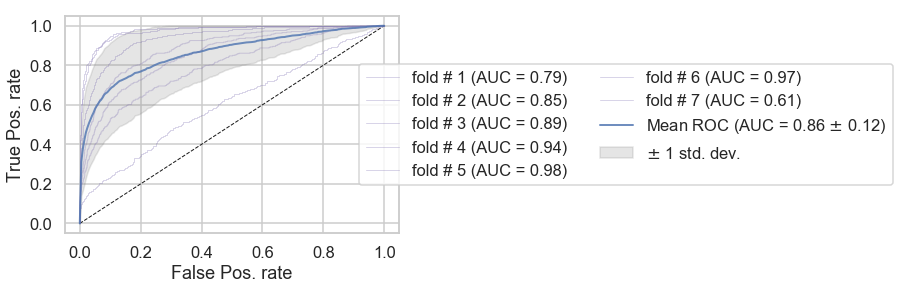

In [603]:
roc0_dev = clf0.plot()

mean AUC: 0.6180 +/- 0.0119


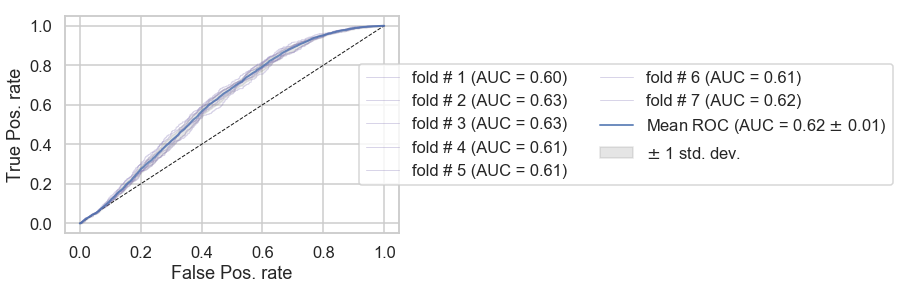

In [604]:
roc0_test = clf0.plot(test='test')

mean Precision: 0.9696 +/- 0.0647
mean Recall: 0.1028 +/- 0.0343


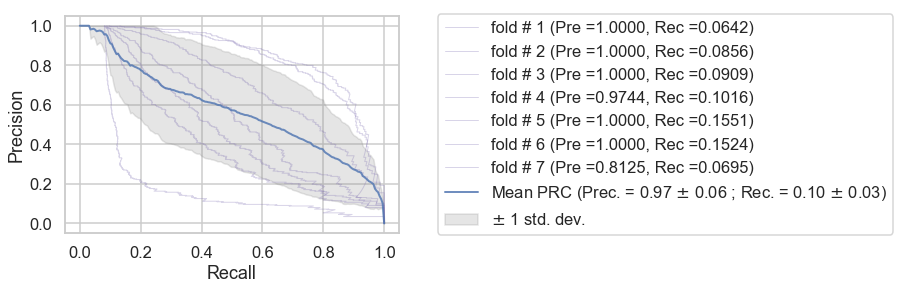

In [681]:
prc0_dev = clf0.plot(kind='prc', ncol=1)

mean Precision: 0.1139 +/- 0.0102
mean Recall: 0.0470 +/- 0.0074


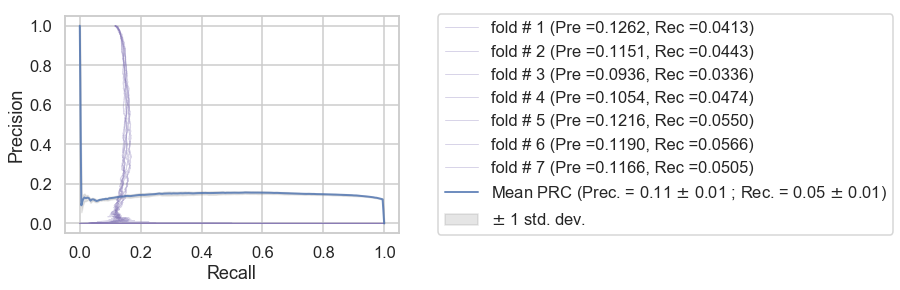

In [682]:
prc0_test = clf0.plot(kind='pr', test='test', ncol=1)

In [633]:
clf0.results

defaultdict(list,
            {'cv_xgb': [{'dev': {'prob': array([0.2699684 , 0.25026694, 0.24430679, ..., 0.78673977, 0.7154953 ,
                       0.6082586 ], dtype=float32),
                'cls': array([0, 0, 0, ..., 1, 1, 1], dtype=uint8),
                'true': array([0., 0., 0., ..., 1., 1., 1.], dtype=float32),
                'confusion_matrix': array([[4285,    0],
                       [ 350,   24]]),
                'f1_score': 0.1206030150753769,
                'roc_auc_score': 0.7901063278817414,
                'precision_score': 1.0,
                'recall_score': 0.06417112299465241,
                'balanced_accuracy_score': 0.5320855614973262},
               'test': {'prob': array([0.21086264, 0.16590227, 0.20697942, ..., 0.18139875, 0.20820567,
                       0.1914963 ], dtype=float32),
                'cls': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
                'true': array([0., 0., 0., ..., 1., 1., 1.], dtype=float32),
                '

<span style="color: red;font-weight: 600;font-size: 150%;">==> Thus:</span>

`AUC` is not reliable enough as a metric in our case to see if the model generalize well. We see that the AUC on the CV training (= mean of scores computed from the out-of-fold data set, 1/7th of the samples) is at 0.86 &pm; 0.12 which is not too bad.

However, when testing on the `test` data set we kept at the beginning, we see AUC dropping to a mere 0.62, barely better than chance.

`Precision` and `Recall` are better metrics for this problem, which we can see as:
- Precision: ability not to produce false positives
- Recall: ability to find all the positive samples

For this model, our recall is very poor (< 0.10) and the precision, while being relatively good in the CV test, drops to 0.11.

We can in the confusion matrices, that there is a large number of false positive.

#### without cross-validation

As a test, we did the same modeling, without cross-validation.

In [683]:
# state = clf.get_state()

In [684]:
clf = Classify(xf_train, yf_train, xf_test, yf_test)
# clf.set_state(state)

In [620]:
_ = clf('under_sample')

==> doing: under_sample...
before under sampling: Counter({0: 224689, 1: 2619})
after under sampling:  Counter({0: 30000, 1: 2619})
==> doing: split...
classes are: [0 1]
train split = [25000, 1965]
dev   split = [5000, 654]
test  split = None
==> doing: train...
[0]	train-aucpr:0.199739	train-auc:0.60666	train-error:0.069683	train-error@0.7:0.072872	dev-aucpr:0.202217	dev-auc:0.575255	dev-error:0.113194	dev-error@0.7:0.11567
Multiple eval metrics have been passed: 'dev-error@0.7' will be used for early stopping.

Will train until dev-error@0.7 hasn't improved in 40 rounds.
[1]	train-aucpr:0.23316	train-auc:0.626228	train-error:0.068904	train-error@0.7:0.072872	dev-aucpr:0.220376	dev-auc:0.584167	dev-error:0.111956	dev-error@0.7:0.11567
[2]	train-aucpr:0.245094	train-auc:0.64164	train-error:0.069349	train-error@0.7:0.072872	dev-aucpr:0.221298	dev-auc:0.583431	dev-error:0.112133	dev-error@0.7:0.11567
[3]	train-aucpr:0.265296	train-auc:0.661333	train-error:0.069905	train-error@0.7:0.0728

[47]	train-aucpr:0.482176	train-auc:0.859027	train-error:0.0682	train-error@0.7:0.071945	dev-aucpr:0.25894	dev-auc:0.593898	dev-error:0.110541	dev-error@0.7:0.114786
[48]	train-aucpr:0.485505	train-auc:0.861959	train-error:0.068162	train-error@0.7:0.071945	dev-aucpr:0.25935	dev-auc:0.595616	dev-error:0.110718	dev-error@0.7:0.114786
[49]	train-aucpr:0.488979	train-auc:0.863889	train-error:0.0682	train-error@0.7:0.071945	dev-aucpr:0.259401	dev-auc:0.595896	dev-error:0.110541	dev-error@0.7:0.114786
[50]	train-aucpr:0.494535	train-auc:0.867311	train-error:0.068125	train-error@0.7:0.07176	dev-aucpr:0.259655	dev-auc:0.596359	dev-error:0.110718	dev-error@0.7:0.114786
[51]	train-aucpr:0.50001	train-auc:0.870457	train-error:0.068088	train-error@0.7:0.07176	dev-aucpr:0.258684	dev-auc:0.596038	dev-error:0.110541	dev-error@0.7:0.114786
[52]	train-aucpr:0.502873	train-auc:0.872969	train-error:0.06794	train-error@0.7:0.071686	dev-aucpr:0.258155	dev-auc:0.59479	dev-error:0.110541	dev-error@0.7:0.1147

[96]	train-aucpr:0.668329	train-auc:0.941359	train-error:0.066308	train-error@0.7:0.070573	dev-aucpr:0.261754	dev-auc:0.589313	dev-error:0.109657	dev-error@0.7:0.11284
[97]	train-aucpr:0.671462	train-auc:0.942097	train-error:0.066234	train-error@0.7:0.070573	dev-aucpr:0.261313	dev-auc:0.587937	dev-error:0.109657	dev-error@0.7:0.11284
[98]	train-aucpr:0.673742	train-auc:0.94265	train-error:0.06616	train-error@0.7:0.070573	dev-aucpr:0.261113	dev-auc:0.587372	dev-error:0.109657	dev-error@0.7:0.11284
[99]	train-aucpr:0.674831	train-auc:0.943	train-error:0.06616	train-error@0.7:0.070573	dev-aucpr:0.260907	dev-auc:0.587227	dev-error:0.109657	dev-error@0.7:0.11284
[100]	train-aucpr:0.679734	train-auc:0.944342	train-error:0.066123	train-error@0.7:0.070536	dev-aucpr:0.260671	dev-auc:0.586594	dev-error:0.109657	dev-error@0.7:0.11284
[101]	train-aucpr:0.682723	train-auc:0.945012	train-error:0.066123	train-error@0.7:0.070425	dev-aucpr:0.26033	dev-auc:0.586344	dev-error:0.10948	dev-error@0.7:0.1128

[145]	train-aucpr:0.782608	train-auc:0.968202	train-error:0.064528	train-error@0.7:0.069831	dev-aucpr:0.25665	dev-auc:0.582167	dev-error:0.108419	dev-error@0.7:0.112133
[146]	train-aucpr:0.783435	train-auc:0.968288	train-error:0.064491	train-error@0.7:0.069868	dev-aucpr:0.256017	dev-auc:0.581481	dev-error:0.108596	dev-error@0.7:0.112133
[147]	train-aucpr:0.784357	train-auc:0.968506	train-error:0.064491	train-error@0.7:0.069868	dev-aucpr:0.255903	dev-auc:0.581179	dev-error:0.108596	dev-error@0.7:0.112133
[148]	train-aucpr:0.785847	train-auc:0.96881	train-error:0.064454	train-error@0.7:0.069794	dev-aucpr:0.255636	dev-auc:0.581155	dev-error:0.108596	dev-error@0.7:0.112133
[149]	train-aucpr:0.787711	train-auc:0.969306	train-error:0.064454	train-error@0.7:0.069794	dev-aucpr:0.255616	dev-auc:0.581092	dev-error:0.108596	dev-error@0.7:0.112133
[150]	train-aucpr:0.789341	train-auc:0.969668	train-error:0.064306	train-error@0.7:0.069646	dev-aucpr:0.255646	dev-auc:0.581386	dev-error:0.108596	dev-e

[194]	train-aucpr:0.857747	train-auc:0.981582	train-error:0.062155	train-error@0.7:0.068756	dev-aucpr:0.252625	dev-auc:0.573995	dev-error:0.107888	dev-error@0.7:0.111779
[195]	train-aucpr:0.858145	train-auc:0.981643	train-error:0.062043	train-error@0.7:0.068719	dev-aucpr:0.252399	dev-auc:0.573541	dev-error:0.107888	dev-error@0.7:0.111779
[196]	train-aucpr:0.858731	train-auc:0.981821	train-error:0.062155	train-error@0.7:0.068719	dev-aucpr:0.252049	dev-auc:0.573289	dev-error:0.108065	dev-error@0.7:0.111602
[197]	train-aucpr:0.860064	train-auc:0.982048	train-error:0.062155	train-error@0.7:0.068756	dev-aucpr:0.252224	dev-auc:0.573288	dev-error:0.107888	dev-error@0.7:0.111779
[198]	train-aucpr:0.861543	train-auc:0.982218	train-error:0.061969	train-error@0.7:0.068682	dev-aucpr:0.252223	dev-auc:0.573179	dev-error:0.107888	dev-error@0.7:0.111779
[199]	train-aucpr:0.862963	train-auc:0.982447	train-error:0.061747	train-error@0.7:0.068645	dev-aucpr:0.252207	dev-auc:0.572979	dev-error:0.108065	dev

[243]	train-aucpr:0.905824	train-auc:0.988839	train-error:0.059002	train-error@0.7:0.067458	dev-aucpr:0.250489	dev-auc:0.572764	dev-error:0.107534	dev-error@0.7:0.111072
[244]	train-aucpr:0.906986	train-auc:0.989011	train-error:0.058928	train-error@0.7:0.067384	dev-aucpr:0.250137	dev-auc:0.572265	dev-error:0.107534	dev-error@0.7:0.111072
[245]	train-aucpr:0.90739	train-auc:0.989049	train-error:0.05878	train-error@0.7:0.067421	dev-aucpr:0.250033	dev-auc:0.57194	dev-error:0.107534	dev-error@0.7:0.111072
[246]	train-aucpr:0.908387	train-auc:0.989152	train-error:0.058854	train-error@0.7:0.067384	dev-aucpr:0.250136	dev-auc:0.571614	dev-error:0.107711	dev-error@0.7:0.110895
[247]	train-aucpr:0.908762	train-auc:0.989197	train-error:0.058743	train-error@0.7:0.067347	dev-aucpr:0.249873	dev-auc:0.571502	dev-error:0.107711	dev-error@0.7:0.110895
[248]	train-aucpr:0.909757	train-auc:0.989349	train-error:0.058632	train-error@0.7:0.067347	dev-aucpr:0.249653	dev-auc:0.571757	dev-error:0.107534	dev-er

[292]	train-aucpr:0.939894	train-auc:0.993405	train-error:0.054997	train-error@0.7:0.066382	dev-aucpr:0.248965	dev-auc:0.568698	dev-error:0.107358	dev-error@0.7:0.110895
[293]	train-aucpr:0.940631	train-auc:0.993534	train-error:0.055034	train-error@0.7:0.066345	dev-aucpr:0.248815	dev-auc:0.568605	dev-error:0.107534	dev-error@0.7:0.110895
[294]	train-aucpr:0.94129	train-auc:0.993615	train-error:0.054849	train-error@0.7:0.066382	dev-aucpr:0.249184	dev-auc:0.568684	dev-error:0.107711	dev-error@0.7:0.110895
[295]	train-aucpr:0.941983	train-auc:0.993697	train-error:0.054775	train-error@0.7:0.066308	dev-aucpr:0.249182	dev-auc:0.568635	dev-error:0.107888	dev-error@0.7:0.110895
[296]	train-aucpr:0.942531	train-auc:0.993796	train-error:0.054812	train-error@0.7:0.066234	dev-aucpr:0.249203	dev-auc:0.568718	dev-error:0.107888	dev-error@0.7:0.110718
[297]	train-aucpr:0.942877	train-auc:0.993834	train-error:0.054701	train-error@0.7:0.066123	dev-aucpr:0.249294	dev-auc:0.568787	dev-error:0.107711	dev-

[341]	train-aucpr:0.961189	train-auc:0.996069	train-error:0.050695	train-error@0.7:0.065196	dev-aucpr:0.247704	dev-auc:0.566472	dev-error:0.107888	dev-error@0.7:0.110187
[342]	train-aucpr:0.961681	train-auc:0.996135	train-error:0.05077	train-error@0.7:0.065121	dev-aucpr:0.247348	dev-auc:0.565976	dev-error:0.107711	dev-error@0.7:0.110187
[343]	train-aucpr:0.961984	train-auc:0.996157	train-error:0.050621	train-error@0.7:0.065121	dev-aucpr:0.247274	dev-auc:0.566143	dev-error:0.107711	dev-error@0.7:0.110187
[344]	train-aucpr:0.962526	train-auc:0.996232	train-error:0.050473	train-error@0.7:0.065084	dev-aucpr:0.246963	dev-auc:0.566037	dev-error:0.107888	dev-error@0.7:0.110187
[345]	train-aucpr:0.963013	train-auc:0.996282	train-error:0.050399	train-error@0.7:0.065084	dev-aucpr:0.246755	dev-auc:0.566141	dev-error:0.107888	dev-error@0.7:0.110187
[346]	train-aucpr:0.963269	train-auc:0.996321	train-error:0.050176	train-error@0.7:0.065047	dev-aucpr:0.246832	dev-auc:0.566419	dev-error:0.107888	dev-

In [621]:
clf.results

{'xgb': {'dev': {'prob': array([0.06054693, 0.07099082, 0.02236399, ..., 0.0192784 , 0.02650523,
          0.08375481], dtype=float32),
   'cls': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
   'true': array([0., 0., 0., ..., 1., 1., 1.], dtype=float32),
   'confusion_matrix': array([[4997,    3],
          [ 605,   49]]),
   'f1_score': 0.13881019830028327,
   'roc_auc_score': 0.5683651376146789,
   'precision_score': 0.9423076923076923,
   'recall_score': 0.07492354740061162,
   'balanced_accuracy_score': 0.5371617737003058},
  'test': {'prob': array([0.03924119, 0.02771356, 0.04125232, ..., 0.162238  , 0.0480884 ,
          0.05040734], dtype=float32),
   'cls': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
   'true': array([0., 0., 0., ..., 1., 1., 1.], dtype=float32),
   'confusion_matrix': array([[4713,  287],
          [ 617,   37]]),
   'f1_score': 0.07566462167689161,
   'roc_auc_score': 0.5920446483180428,
   'precision_score': 0.11419753086419752,
   'recall_score': 0.0565749

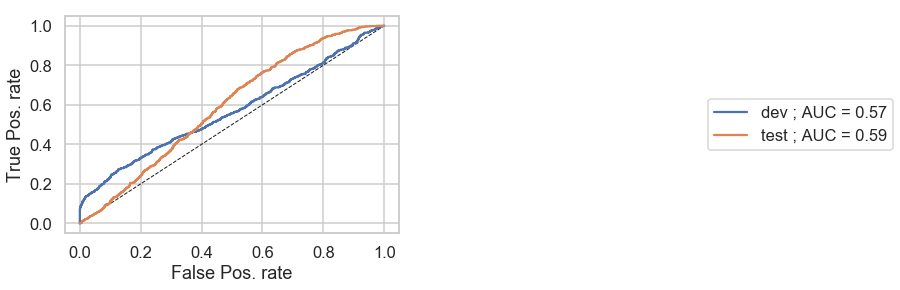

In [685]:
roc = clf.plot(kind='roc', ncol=1)

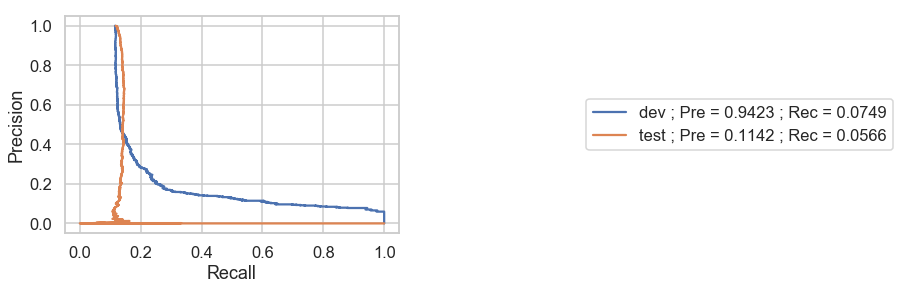

In [686]:
prc = clf.plot(kind='prc', ncol=1)

We can see the very poor value of `AUC`, `Precision` and `Recall`.

It might be an indication that:
- number of samples are too low
- the model's parameters need to be optimized (number of trees, learning rate, weighting, ...)

Even though the model is not good, we can have a look at the 20 features that played a greater role in the predictions.

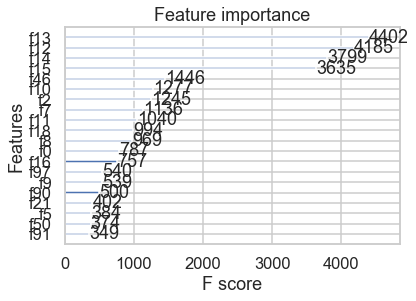

In [687]:
xgb.plot_importance(clf.bst, max_num_features=20)

In [636]:
def feature_names(f_map, *args):
    return [f_map[_ if isinstance(_, str) else f'f{_:d}'] for _ in args]

In [637]:
_ = list(xf_train)
f_map = {clf.bst.feature_names[i]: _[i] for i in range(len(_))}

In [662]:
_ = list(clf.bst.get_fscore().items())
fscores = pd.DataFrame([float(_x[1]) for _x in _], columns=['fscore'],
                       index=feature_names(f_map, *[_x[0] for _x in _]))
fscores.sort_values(by='fscore', axis=0, ascending=False, inplace=True)

In [667]:
fscores.head(20) / fscores.max()

fscore
Commission Amount                 1.000000
Total Gross Premium excl IPT      0.950704
Net Premium to UW                 0.863017
Gross Premium Excl PI             0.825761
TotalEmployees                    0.328487
Trade 1 Risk Level                0.290095
Tools Sum Insured                 0.282826
Manual EE                         0.258065
Trade 2 Risk Level                0.236256
CombinedTradeRiskLevel            0.225806
Clerical EE                       0.220127
Public Liability Limit            0.178782
Gross PI Premium                  0.171967
Transaction Type=new business     0.122672
Subcontractor EE                  0.122444
Underwriting Year=2013            0.113585
Public_Liability_Limit_2000000    0.091322
Hired in Plan Sum Insured         0.087233
Trade 1 Category=building/allied  0.084961
Underwriting Year=2014            0.079282

As a outsider to the insurance field, these features seem reasonable to me. In particular, it seems that (new) businesses, in the field of construction, and with manuel employee, tend to contribute have more claims.

But the most important features by far, seem to be the one related to the amounts paid to the insurance (in various flavors).

### uncontrolled

Another strategy for under-sampling the majority class... gave up as it was taking a long time to compute.

In [379]:
from imblearn.under_sampling import RepeatedEditedNearestNeighbours, EditedNearestNeighbours

In [372]:
clf2 = Classify(xf_train, yf_train, xf_test, yf_test)

In [ ]:
# computation time is very high :/

## Over- and under- sampling (combined)

This is a promising approach: instead of just down-sampling the majority class, here we also over-sample (eg. producing synthetic samples) the minority class.

Producing synthetic samples seem to be very time-consuming.

A simpler approach, but less effective a priori, is to simply randomly over-sample the minority class (sampling with replacement). This will force the model to pay attention to the minority class features, but will likely overfit.

In [688]:
from imblearn.over_sampling import SMOTENC, BorderlineSMOTE, RandomOverSampler
from imblearn.combine import SMOTEENN

In [ ]:
# takes a lot of computational time :/ Shoud try other algorightm and see how if could improve

In [513]:
#clf3 = Classify(xf_train, yf_train)

In [ ]:
#clf3('over_sample')

In [700]:
clf3 = Classify(xf_train, yf_train, xf_test, yf_test)

In [701]:
clf3.under_sample(sampling_strategy={0: 70000, 1: clf3.classes[1]}, n_neighbors_ver3=40)

before under sampling: Counter({0: 224689, 1: 2619})


/Users/mhavel/Documents/working/virtualenvs/default/lib/python3.6/site-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:194: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn('The number of the samples to be selected is larger'


after under sampling:  Counter({0: 64555, 1: 2619})


In [702]:
clf3.over_sample(algo=RandomOverSampler, params={'random_state': 56,
                                                 'sampling_strategy': {0: 70000, 1: 50000}})

before over sampling: Counter({0: 64555, 1: 2619})
after under sampling:  Counter({0: 70000, 1: 50000})


/Users/mhavel/Documents/working/virtualenvs/default/lib/python3.6/site-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (70000) in class 0 will be larger than the number of samples in the majority class (class #0 -> 64555)
  n_samples_majority))


In [704]:
clf3.split()

classes are: [0 1]
train split = [65000, 37500]
dev   split = [5000, 12500]
test  split = None


In [706]:
clf3.train(num_boost_round=40).test()

[0]	train-aucpr:0.943629	train-auc:0.646752	train-error:0.082596	train-error@0.7:0.908642	dev-aucpr:0.985911	dev-auc:0.637165	dev-error:0.020527	dev-error@0.7:0.977369
Multiple eval metrics have been passed: 'dev-error@0.7' will be used for early stopping.

Will train until dev-error@0.7 hasn't improved in 40 rounds.
[1]	train-aucpr:0.947437	train-auc:0.670229	train-error:0.079171	train-error@0.7:0.908642	dev-aucpr:0.986696	dev-auc:0.657967	dev-error:0.019682	dev-error@0.7:0.977369
[2]	train-aucpr:0.950006	train-auc:0.687821	train-error:0.086172	train-error@0.7:0.908642	dev-aucpr:0.987242	dev-auc:0.67199	dev-error:0.021426	dev-error@0.7:0.977369
[3]	train-aucpr:0.952472	train-auc:0.703519	train-error:0.084559	train-error@0.7:0.908642	dev-aucpr:0.987986	dev-auc:0.689356	dev-error:0.021066	dev-error@0.7:0.977369
[4]	train-aucpr:0.953303	train-auc:0.708351	train-error:0.086231	train-error@0.7:0.908642	dev-aucpr:0.988246	dev-auc:0.695847	dev-error:0.021411	dev-error@0.7:0.977369
[5]	train-

In [707]:
clf3.results

{'xgb': {'dev': {'prob': array([0.73914814, 0.7074024 , 0.676962  , ..., 0.74615353, 0.74615353,
          0.74615353], dtype=float32),
   'cls': array([1, 1, 1, ..., 1, 1, 1], dtype=uint8),
   'true': array([0., 0., 0., ..., 1., 1., 1.], dtype=float32),
   'confusion_matrix': array([[   316,   5471],
          [     0, 249928]]),
   'f1_score': 0.9891733471593641,
   'roc_auc_score': 0.7629503116838897,
   'precision_score': 0.9785786162044487,
   'recall_score': 1.0,
   'balanced_accuracy_score': 0.5273025747364783},
  'test': {'prob': array([0.7083374 , 0.36626396, 0.51085603, ..., 0.73882973, 0.69710785,
          0.74546546], dtype=float32),
   'cls': array([1, 0, 1, ..., 1, 1, 1], dtype=uint8),
   'true': array([0., 0., 0., ..., 1., 1., 1.], dtype=float32),
   'confusion_matrix': array([[1030, 3970],
          [  17,  637]]),
   'f1_score': 0.24215928530697586,
   'roc_auc_score': 0.7151704892966362,
   'precision_score': 0.13826785326676796,
   'recall_score': 0.9740061162079511

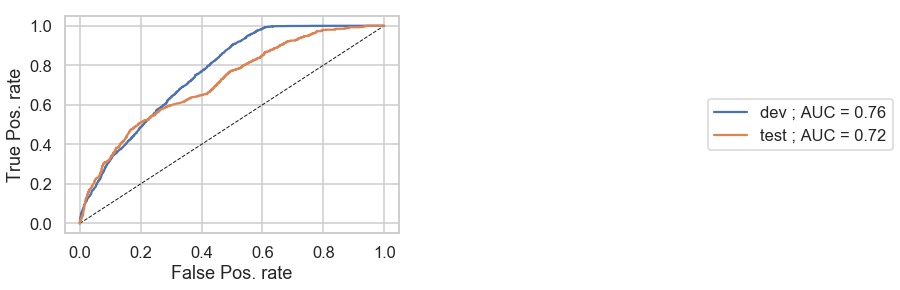

In [708]:
roc3 = clf3.plot(kind='roc', ncol=1)

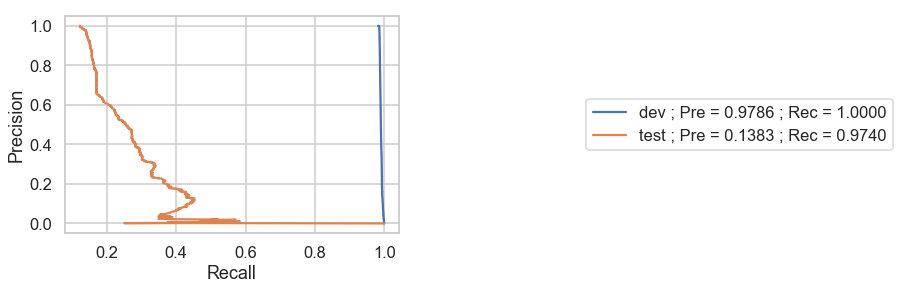

In [709]:
prc3 = clf3.plot(kind='prc', ncol=1)

This model is not too bad, though on real new data set (`test` set), `Precision` is way too low.

## Ensemble of samplers

Instead of randomly sampling with replacement, we can also train several models, each working on a portion of the majority class. This is an ensemble classifier (using ADABoost as a backend).

In [414]:
from imblearn.ensemble import EasyEnsembleClassifier

In [624]:
clf4 = Classify(xf_train, yf_train, xf_test, yf_test)

In [478]:
# clf4.split(random_state=12345, dev=(5000, .2))

classes are: [0 1]
train split = [224689, 2619]
dev   split = [5000, 654]
test  split = None


In [625]:
clf4.ensemble()

before under sampling: Counter({0: 224689, 1: 2619})


In [626]:
clf4.test()

In [628]:
clf4.ec.score(clf4.x_test, clf4.y_test)

0.8323310930314821

In [629]:
clf4.results

{'ensemble': {'test': {'prob': array([0.48793026, 0.47487828, 0.47591567, ..., 0.49934523, 0.50389732,
          0.50153613]),
   'cls': array([0, 0, 0, ..., 0, 1, 1]),
   'true': array([0, 0, 0, ..., 1, 1, 1]),
   'pred': array([[0.51206974, 0.48793026],
          [0.52512172, 0.47487828],
          [0.52408433, 0.47591567],
          ...,
          [0.50065477, 0.49934523],
          [0.49610268, 0.50389732],
          [0.49846387, 0.50153613]]),
   'cls2': array([0, 0, 0, ..., 0, 1, 1], dtype=uint8),
   'confusion_matrix': array([[4419,  581],
          [ 367,  287]]),
   'f1_score': 0.3771353482260184,
   'roc_auc_score': 0.7942931192660551,
   'precision_score': 0.33064516129032256,
   'recall_score': 0.43883792048929665,
   'balanced_accuracy_score': 0.6613189602446483}}}

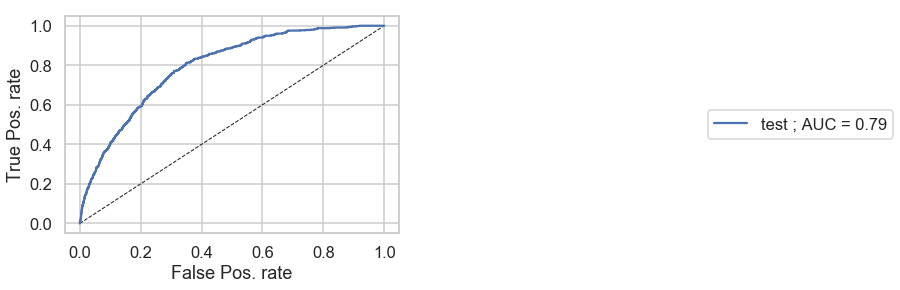

In [630]:
roc4 = clf4.plot(kind='roc', ncol=1, test='test')

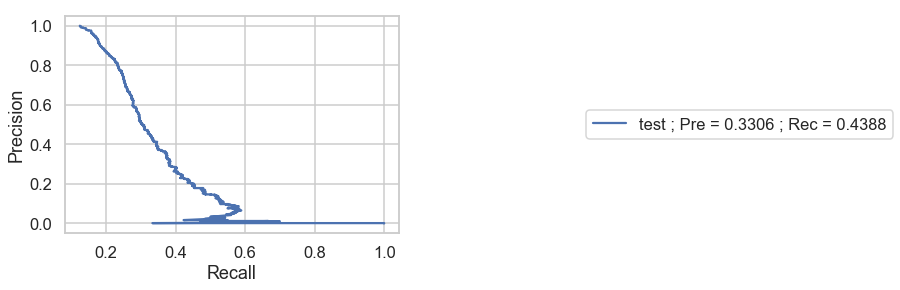

In [631]:
prc4 = clf4.plot(kind='prc', ncol=1, test='test')

This is the best model so far. Optimizing it would likely get us to a level where the model starts being usable in business, but this remains to be tested. 

# Conclusions

The data set is very imbalanced, and therefore the conventional approaches do not work well. The different approaches above do not produce yet a model that could be useful as too many test samples are false positive or false negative.

With more time, these could be tried to improve the situation:
- grid searching the optimal parameters for the models
- adding back the 2 location features (likely Leave-one-out encoded) to help (maybe)
- use a completely different class of algorithm: SVM
- use a completely different approach: outlier / novelty detection (eg. with one-class SVM, or local outlier classifier).
- try the production of large synthetic samples